# Analysis of the Bollinger Band Mean Regression

**introduction-**


The Bollinger Bands (BB) mean reversion(regression) trading strategy is a popular approach in technical analysis used to identify potential trading opportunities based on the principle of mean reversion. Developed by John Bollinger, Bollinger Bands consist of three lines: a simple moving average (SMA) and two standard deviation lines (upper and lower bands) that measure market volatility. The core idea is that prices tend to revert to the mean or average level, which is represented by the SMA.

When the price moves significantly away from the SMA and touches or breaches the upper or lower bands, it indicates a potential trading opportunity. A mean reversion strategy assumes that these extreme price levels will revert back towards the SMA. Therefore, traders may look to sell when the price touches the upper band (indicating overbought conditions) and buy when the price touches the lower band (indicating oversold conditions).


**Strengths:**
Simplicity: Bollinger Bands provide clear visual cues for identifying potential entry and exit points.


Volatility Measurement: The bands expand and contract with market volatility, offering a dynamic view of market conditions.


Versatility: Applicable across various financial instruments, including stocks, futures, and currencies.

**Limitations:**
False Signals: In highly volatile markets, Bollinger Bands can produce false signals.
Lagging Indicator: Being based on moving averages, they may lag behind real-time price movements.
Adjustment Needed: Parameters need to be fine-tuned for different assets and market conditions.

**Empirical Studies and Applications**
Stock Market:
Chen tested the BB strategy on the CSI 300 stock index futures, incorporating wavelet noise reduction. His findings indicated that the BB method, particularly when combined with wavelet analysis, yielded higher returns and lower risks compared to initial tests .

 the relationship between BB bandwidth and market risk, providing insights into stock market volatility and risk assessment .

Thangjam evaluated BB's effectiveness in capturing stock volatility and identifying support and resistance levels .

**Digital Currencies**:
Zhou Xu analyzed BB's feasibility in the digital currency market (BTC, LTC, ETH, EOS) through Hurst index analysis and parameter optimization, indicating its potential applicability in this domain .

**Quantitative Models:**
Li developed a quantitative investment model using BB for China's A-share market, demonstrating its practical significance .
Lento found that, after adjusting for transaction costs, BB was generally unable to outperform a buy-and-hold strategy, though profitability improved using a contrarian approach .

**Enhanced Techniques:**
Wang optimized BB parameters for specific industries to outperform market averages, contributing to the development of quantitative stock selection and timing strategies .

Bernis compared signal richness between Western and standard BB, providing insights for credit asset trading .
Song and Liao incorporated BB into statistical arbitrage strategies, highlighting its effectiveness in dynamic trend tracking and position management .

**Purpose and Scope of the Study**
This paper aims to analyze SP500 stock records to identify appropriate entry and exit points using Bollinger Bands within a specific year. By providing corresponding plot charts, the study seeks to offer a vivid and convincing analysis to help investors optimize their investment strategies and returns. The research will contribute to a deeper understanding of the BB mean reversion strategy's practical application in modern financial markets.







In [25]:
import pandas as pd
import yfinance as yf

# Define the stock codes and the time period
stock_codes = ["AAPL", "TSLA", "GOOGL", "MSFT", "NFLX"]
start_date = "2019-01-01"
end_date = "2023-01-31"

# Retrieve historical data from Yahoo Finance
stock_data = {}
for code in stock_codes:
    stock_data[code] = yf.download(code, start=start_date, end=end_date,interval='1mo')['Close']

# Convert to DataFrame
df = pd.DataFrame(stock_data)
df


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,TSLA,GOOGL,MSFT,NFLX
Date,,,,,
2019-01-01,41.610001,20.468000,56.294498,104.430000,339.500000
2019-02-01,43.287498,21.325333,56.327499,112.029999,358.100006
2019-03-01,47.487499,18.657333,58.844501,117.940002,356.559998
2019-04-01,50.167500,15.912667,59.948002,130.600006,370.540009
2019-05-01,43.767502,12.344000,55.325001,123.680000,343.279999
2019-06-01,49.480000,14.897333,54.139999,133.960007,367.320007
2019-07-01,53.259998,16.107332,60.910000,136.270004,322.989990
2019-08-01,52.185001,15.040667,59.526501,137.860001,293.750000
2019-09-01,55.992500,16.058001,61.056999,139.029999,267.619995


In [11]:
# Drop rows with missing data
df.dropna(inplace=True)


In [12]:
descriptive_stats = df.describe()
print(descriptive_stats)


              AAPL         TSLA        GOOGL         MSFT         NFLX
count  1027.000000  1027.000000  1027.000000  1027.000000  1027.000000
mean    111.204620   158.829919    93.077012   217.356329   403.485647
std      42.957681   115.345197    29.798640    64.691133   124.733783
min      35.547501    11.931333    51.273499    97.400002   166.369995
25%      67.044998    28.841001    64.887249   154.974998   309.395004
50%     124.807503   173.949997    88.419998   224.149994   374.489990
75%     146.815002   248.101662   117.202000   266.054993   508.800003
max     182.009995   409.970001   149.838501   343.109985   691.690002


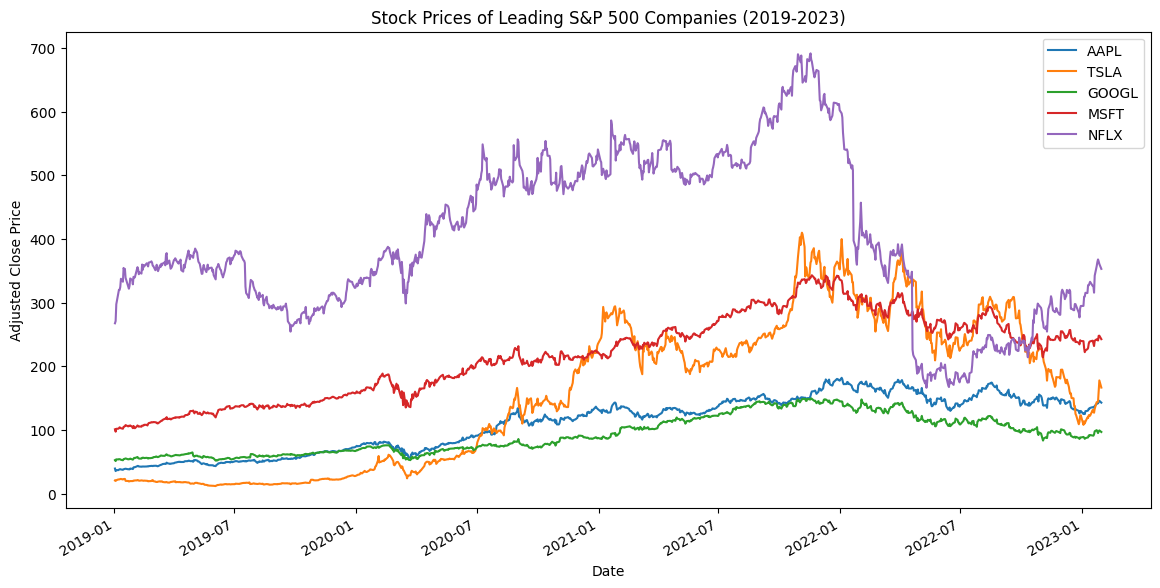

In [13]:
import matplotlib.pyplot as plt

# Plotting the time series for each stock
df.plot(figsize=(14, 7))
plt.title('Stock Prices of Leading S&P 500 Companies (2019-2023)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend(stock_codes)
plt.show()


The research method involves applying the Bollinger Bands mean reversion trading strategy to historical stock price data. Specifically, a 20-day simple moving average (SMA) is used for the middle band, and the upper and lower bands are set at two standard deviations above and below the middle band, respectively. This section describes the calculation of Bollinger Bands, the process of identifying buy and sell signals, and the analysis of stock price charts to evaluate the effectiveness of the strategy.

Bollinger Bands Calculation
Bollinger Bands consist of three lines:

**Middle Band (MB): A 20-day SMA of the closing prices.**


**Upper Band (UB): The middle band plus two standard deviations of the closing prices.**


**Lower Band (LB): The middle band minus two standard deviations of the closing prices.**
The formulas are as follows:


**𝑀
𝐵
=
SMA
(
20
)**




**UB=MB+2×σ**



**LB=MB−2×σ**


Where

σ is the standard deviation of the closing prices over the past 20 days.







**Identifying Buy and Sell Signals**




The Bollinger Bands mean reversion strategy identifies potential buy and sell signals based on the stock price's position relative to the bands:

**Buy Signal:** When the stock price touches or crosses below the lower band (LB), it indicates that the stock is potentially oversold and may revert back to the mean (MB).



**Sell Signal:** When the stock price touches or crosses above the upper band (UB), it indicates that the stock is potentially overbought and may revert back to the mean(MB).

# Analysis of Stock Price charts






To analyze the effectiveness of the Bollinger Bands strategy, stock price charts over the study period are examined to observe the general relationship between price movements and the Bollinger Bands.

The following steps outline the process:

**Data Preparation:**

Collect historical closing prices for each stock from Yahoo Finance.
Calculate the 20-day SMA and standard deviations to determine the Bollinger Bands.


**Visualization:**

Plot the stock price along with the Bollinger Bands on a time series chart.
Highlight points where buy and sell signals occur based on the criteria mentioned above.



**Performance Evaluation:**

Analyze the success of the buy and sell signals by examining subsequent price movements.
Compare the performance of the Bollinger Bands strategy against a buy-and-hold strategy.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******************

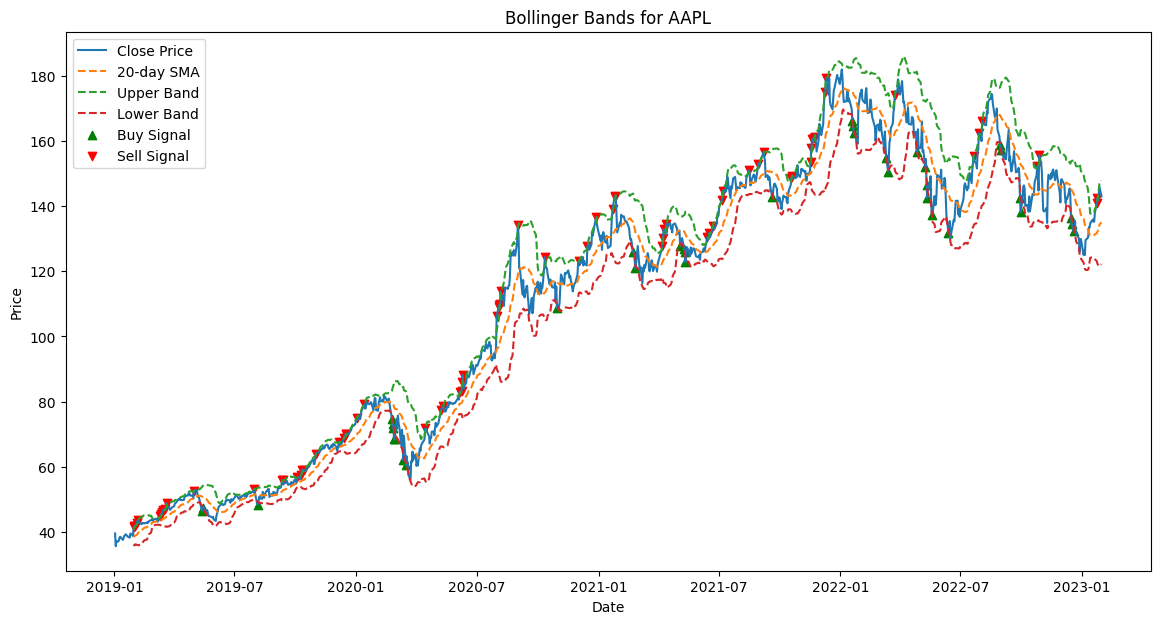

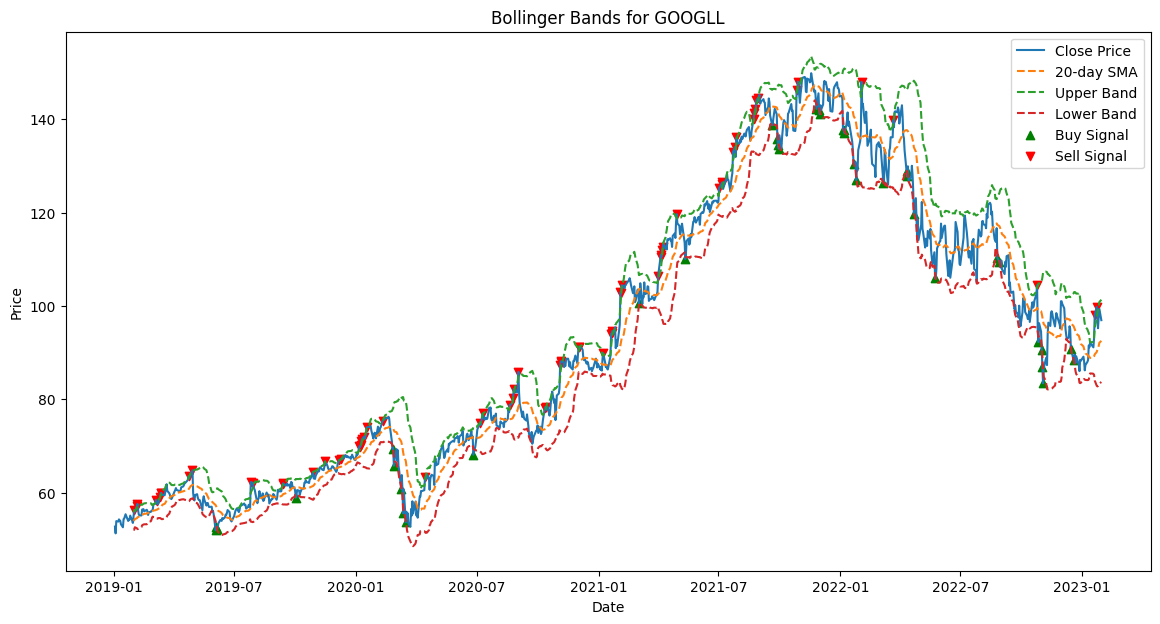

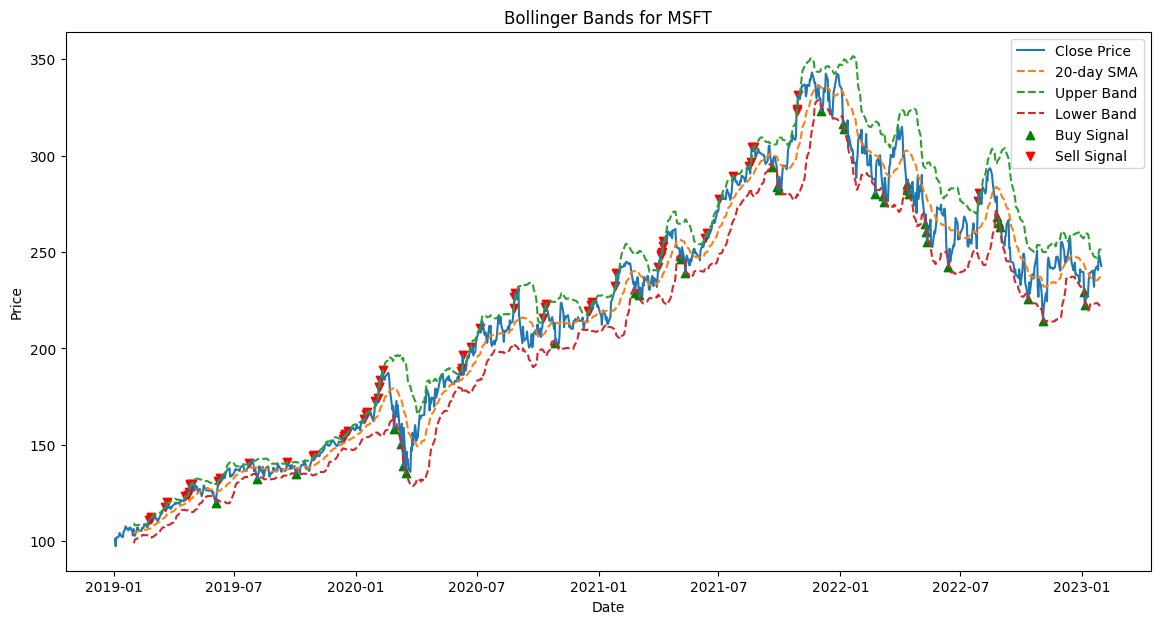

In [26]:
import pandas as pd
import yfinance as yf
import numpy as np
import pandas as pd
import yfinance as yf

# Define the stock codes and the time period
stock_codes = ["AAPL", "TSLA", "GOOGL", "MSFT", "NFLX"]
start_date = "2019-01-01"
end_date = "2023-01-31"

# Retrieve historical data from Yahoo Finance
stock_data = {}
for code in stock_codes:
    stock_data[code] = yf.download(code, start=start_date, end=end_date,interval='1mo')['Close']

# Convert to DataFrame
df = pd.DataFrame(stock_data)
df


# Define the stock codes and the time period
stock_codes = ["AAPL", "MSFT", "AMZN", "GOOGL", "FB", "BRK-B", "JNJ", "V", "PG", "JPM"]
start_date = "2019-01-01"
end_date = "2023-01-31"

# Retrieve historical data from Yahoo Finance
stock_data = {}
for code in stock_codes:
    stock_data[code] = yf.download(code, start=start_date, end=end_date, interval="1d")['Close']

# Convert to DataFrame
df = pd.DataFrame(stock_data)

# Calculate Bollinger Bands
def calculate_bollinger_bands(stock_series):
    sma = stock_series.rolling(window=20).mean()
    std = stock_series.rolling(window=20).std()
    upper_band = sma + (std * 2)
    lower_band = sma - (std * 2)
    return sma, upper_band, lower_band

# Apply calculation to each stock
bb_data = {}
for code in stock_codes:
    sma, upper_band, lower_band = calculate_bollinger_bands(df[code])
    bb_data[code] = pd.DataFrame({'Close': df[code], 'SMA': sma, 'Upper Band': upper_band, 'Lower Band': lower_band})

def identify_signals(stock_df):
    buy_signals = []
    sell_signals = []
    for i in range(len(stock_df)):
        if stock_df['Close'].iloc[i] < stock_df['Lower Band'].iloc[i]:
            buy_signals.append(stock_df['Close'].iloc[i])
            sell_signals.append(np.nan)
        elif stock_df['Close'].iloc[i] > stock_df['Upper Band'].iloc[i]:
            sell_signals.append(stock_df['Close'].iloc[i])
            buy_signals.append(np.nan)
        else:
            buy_signals.append(np.nan)
            sell_signals.append(np.nan)
    return buy_signals, sell_signals

# Apply signal identification to each stock
for code in stock_codes:
    buy_signals, sell_signals = identify_signals(bb_data[code])
    bb_data[code]['Buy Signal'] = buy_signals
    bb_data[code]['Sell Signal'] = sell_signals
import matplotlib.pyplot as plt

# Plotting the Bollinger Bands and signals for a selected stock
def plot_bollinger_bands(stock_df, stock_code):
    plt.figure(figsize=(14, 7))
    plt.plot(stock_df['Close'], label='Close Price')
    plt.plot(stock_df['SMA'], label='20-day SMA', linestyle='--')
    plt.plot(stock_df['Upper Band'], label='Upper Band', linestyle='--')
    plt.plot(stock_df['Lower Band'], label='Lower Band', linestyle='--')
    plt.scatter(stock_df.index, stock_df['Buy Signal'], label='Buy Signal', marker='^', color='green')
    plt.scatter(stock_df.index, stock_df['Sell Signal'], label='Sell Signal', marker='v', color='red')
    plt.title(f'Bollinger Bands for {stock_code}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Plot for a specific stock (e.g., Apple Inc.)
plot_bollinger_bands(bb_data['AAPL'], 'AAPL')
plot_bollinger_bands(bb_data['GOOGL'], 'GOOGLL')
plot_bollinger_bands(bb_data['MSFT'], 'MSFT')




